https://github.com/4GeeksAcademy/Hector-linear-regression.git

In [24]:
# Your code here
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
#Filtraremos y procesaremos los datos de df
data = data.drop_duplicates().reset_index(drop = True)

In [27]:
# Crear el encoder
label_encoder = LabelEncoder()

# Aplicar el encoder a la columna
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

#data.drop(columns=['sex','smoker','region'], inplace = True)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [28]:
#Creamos 4 columas en funcion de la region ya que cada region debe tener un coeficiente diferente y no depender de uno unico constante
# Crear un DataFrame de ejemplo

# Crear dummy para las cuatro regiones.
#noreste, sureste, suroeste, noroeste

# Crear variables dummy para cada categoría en 'region'
data_dummies = pd.get_dummies(data['region'], prefix='region')

# Unir las nuevas columnas dummy al DataFrame original
data = pd.concat([data, data_dummies], axis=1)

# Crear las columnas booleanas en función de las condiciones
data['region_northeast'] = data['region_northeast'].astype(int)  # Convertir True/False a 1/0
data['region_northwest'] = data['region_northwest'].astype(int)  # Convertir True/False a 1/0
data['region_southeast'] = data['region_southeast'].astype(int)  # Convertir True/False a 1/0
data['region_southwest'] = data['region_southwest'].astype(int)  # Convertir True/False a 1/0

data.head()

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0


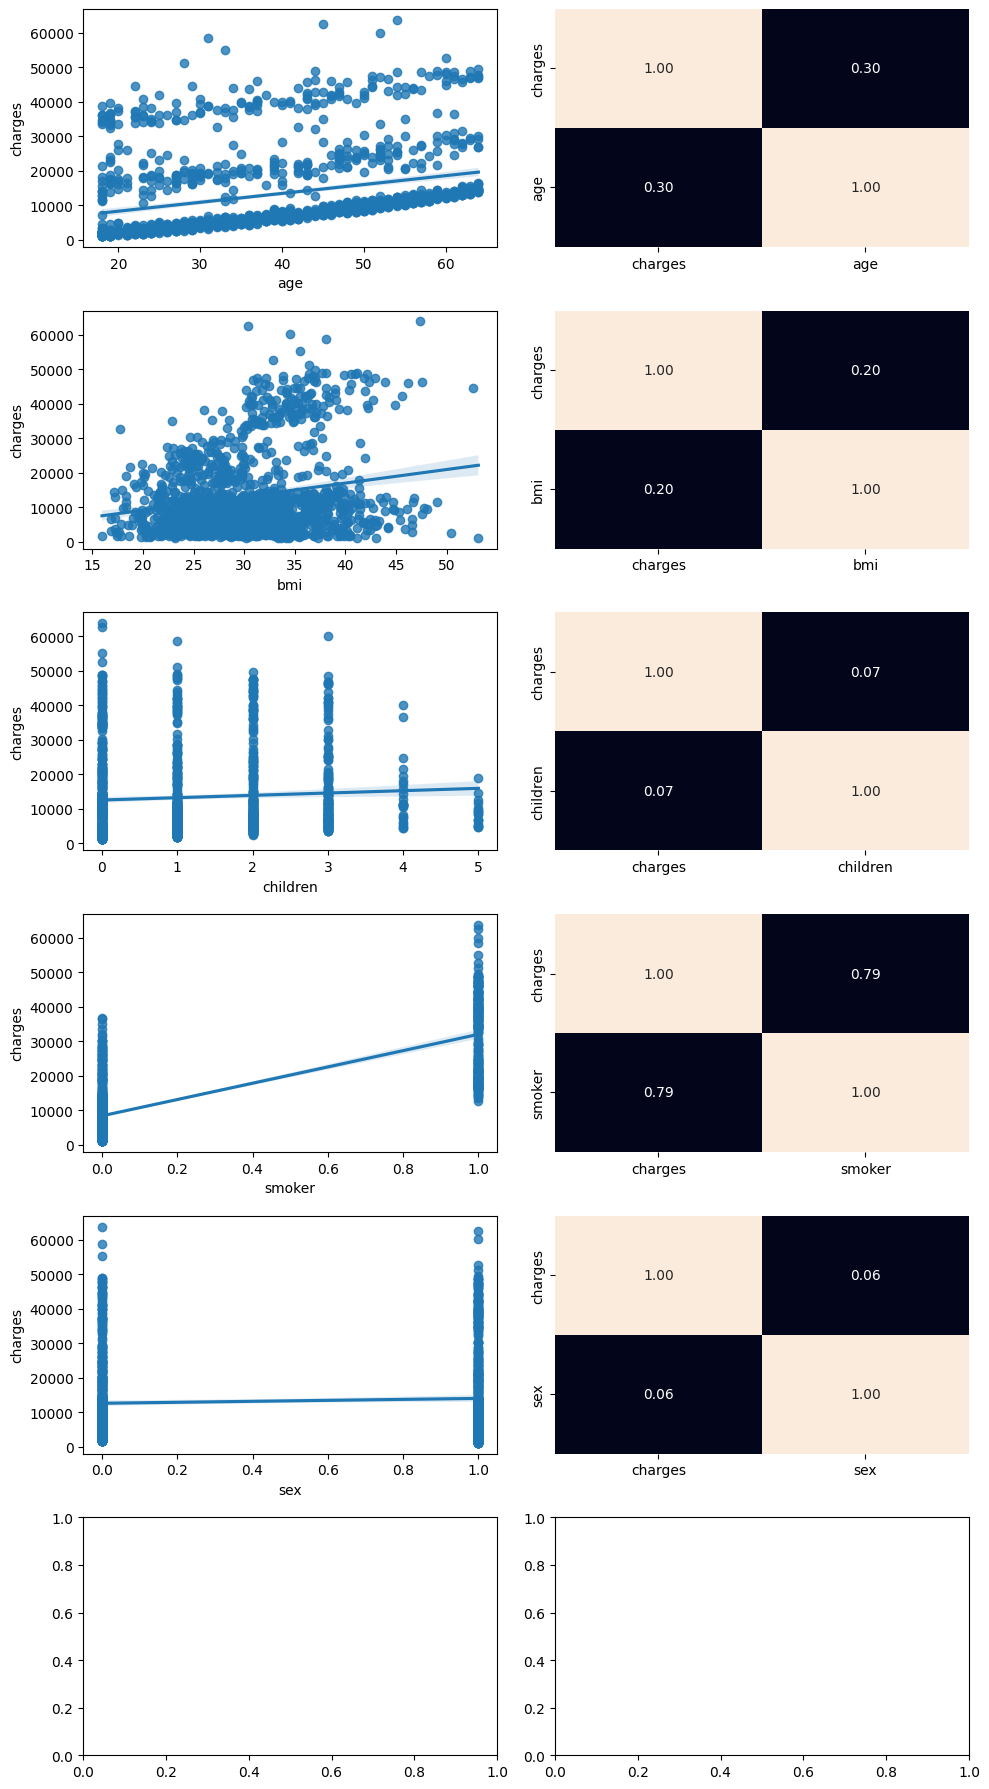

In [29]:
#Analizaremos la regresion lineal

fig, axis = plt.subplots(6, 2, figsize = (10, 18))

sns.regplot(data = data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[0, 1], cbar = False)

sns.regplot(data = data, x = "bmi", y = "charges", ax = axis[1, 0])
sns.heatmap(data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1], cbar = False)

sns.regplot(data = data, x = "smoker", y = "charges", ax = axis[3, 0])
sns.heatmap(data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

sns.regplot(data = data, x = "sex", y = "charges", ax = axis[4, 0])
sns.heatmap(data[["charges", "sex"]].corr(), annot = True, fmt = ".2f", ax = axis[4, 1], cbar = False)

#sns.regplot(data = data, x = "region", y = "charges", ax = axis[5, 0])
#sns.heatmap(data[["charges", "region"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1], cbar = False)

plt.tight_layout()
plt.show()

In [31]:
X = data.drop(['charges','region','region_northeast'], axis=1)
y = data['charges']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 23 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:29:32   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    988.227  

Si p Valor es mayor que 0.1, eso significa no es significativo. En nuestro caso launica variable no significativa es la sex y region_northwest

Coeficiente es y=coef*x en promedio, define la inclinacion del la regresion lineal
Charges = -11810 + 257.2032 * age - 129.4009 * sex + 332.5957 * bim + 478.7717 * children + 23820 * smoke + (Dependidendo de que region pertenezcas es mas o menos)

R-squred -> el 75% del valor de la variabilidad del costes esta explicado por las variables del DF